# Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

Problem 1A:
1. State the null and the alternate hypothesis for conducting one-way ANOVA for both Education
and Occupation individually.
2. Perform a one-way ANOVA on Salary with respect to Education. State whether the null
hypothesis is accepted or rejected based on the ANOVA results.
3. Perform a one-way ANOVA on Salary with respect to Occupation. State whether the null
hypothesis is accepted or rejected based on the ANOVA results.
4. If the null hypothesis is rejected in either (2) or in (3), find out which class means are
significantly different. Interpret the result. (Non-Graded)


Problem 1B:
1. What is the interaction between two treatments? Analyze the effects of one variable on the
other (Education and Occupation) with the help of an interaction plot.[hint: use the ‘pointplot’
function from the ‘seaborn’ function]
2. Perform a two-way ANOVA based on Salary with respect to both Education and Occupation
(along with their interaction Education*Occupation). State the null and alternative hypotheses
and state your results. How will you interpret this result?
3. Explain the business implications of performing ANOVA for this particular case study.

In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA
%matplotlib inline

In [218]:
df = pd.read_csv('SalaryData.csv')

In [219]:
df.head()

Education     Occupation  Salary
0   Doctorate   Adm-clerical  153197
1   Doctorate   Adm-clerical  115945
2   Doctorate   Adm-clerical  175935
3   Doctorate   Adm-clerical  220754
4   Doctorate          Sales  170769

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [221]:
df.isnull().values.any()

False

In [222]:
df.dtypes

Education     object
Occupation    object
Salary         int64
dtype: object

In [223]:
dups = df.duplicated()
dups.sum()

0

In [224]:
df.describe(include = 'all')

Education       Occupation         Salary
count           40               40      40.000000
unique           3                4            NaN
top      Doctorate   Prof-specialty            NaN
freq            16               13            NaN
mean           NaN              NaN  162186.875000
std            NaN              NaN   64860.407506
min            NaN              NaN   50103.000000
25%            NaN              NaN   99897.500000
50%            NaN              NaN  169100.000000
75%            NaN              NaN  214440.750000
max            NaN              NaN  260151.000000

In [225]:
df.Education = pd.Categorical(df.Education)
df.Occupation = pd.Categorical(df.Occupation)
df.dtypes

Education     category
Occupation    category
Salary           int64
dtype: object

# 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

One way ANOVA(Education)
Null Hypothesis 𝐻0: The mean salary is the same across all the 3 categories of education (Doctorate, Bachelors, HS-Grad).
Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of education.
    
One way ANOVA(Occupation)
Null Hypothesis 𝐻0: The mean salary is the same across all the 4 categories of occupation(Prof-Specialty, Sales, Adm-clerical, Exec-Managerial).
Alternate Hypothesis 𝐻1: The mean salary is different in at least one category of occupation.
    
Where Alpha = 0.05
* If the p-value is < 0.05, then we reject the null hypothesis.
* If the p-value is >= 0.05, then we fail to reject the null hypothesis

# 1.2 Perform one-way ANOVA for Education with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [226]:
df['Education'].value_counts()

 Doctorate    16
 Bachelors    15
 HS-grad       9
Name: Education, dtype: int64

In [227]:
formula = 'Salary ~ C(Education)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


Since the p value = 1.257709e-08 is less than the significance level (alpha = 0.05), we can reject the null hypothesis and conclude that there is a significant difference in the mean salaries for at least one category of education.

# 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [228]:
df['Occupation'].value_counts()

 Prof-specialty     13
 Sales              12
 Adm-clerical       10
 Exec-managerial     5
Name: Occupation, dtype: int64

In [229]:
formula = 'Salary ~ C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


Since the p value = 0.458508 is greater than the significance level (alpha = 0.05), we fail to reject the null hypothesis (i.e. we accept H0) and conclude that there is no significant difference in the mean salaries across the 4 categories of occupation.

# 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

In [230]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [231]:
#To find out which class means are significantly different, the Tukey Honest Significant Difference test is performed.
# perform multiple pairwise comparison (Tukey HSD)

m_comp = pairwise_tukeyhsd(endog=df['Salary'], groups=df['Education'], alpha=0.05)
print(m_comp)


#Using, the Tukey Honest Significant Difference test, we get the following table for the category education:

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


 since the p- values(p-adj in the table) are lesser than the significance level for all the three categories of education, this implies that the mean salaries across all categories of education are different.

In [232]:
m_comp = pairwise_tukeyhsd(endog=df['Salary'], groups=df['Occupation'], alpha=0.05)
print(m_comp)

#Using, the Tukey Honest Significant Difference test, we get the following table for the category Occupation:

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
     group1           group2        meandiff  p-adj     lower        upper    reject
------------------------------------------------------------------------------------
    Adm-clerical  Exec-managerial     55693.3 0.4146  -40415.1459 151801.7459  False
    Adm-clerical   Prof-specialty  27528.8538 0.7252  -46277.4011 101335.1088  False
    Adm-clerical            Sales  16180.1167    0.9  -58951.3115  91311.5449  False
 Exec-managerial   Prof-specialty -28164.4462 0.8263 -120502.4542  64173.5618  False
 Exec-managerial            Sales -39513.1833 0.6507 -132913.8041  53887.4374  False
  Prof-specialty            Sales -11348.7372    0.9  -81592.6398  58895.1655  False
------------------------------------------------------------------------------------


For the category occupation, the Tukey Honest Significant Difference test has further confirmed that the mean salaries across all occupation classes are significantly same. The table below confirms the same, wherein we see that all p-values are greater than 0.05.

# 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

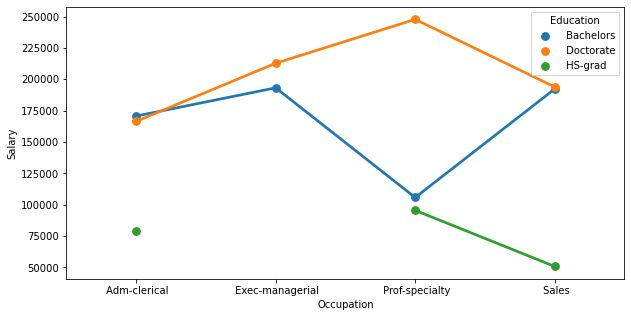

In [233]:
plt.figure(figsize=(10,5))
sns.pointplot(x='Occupation', y='Salary', data=df,  hue='Education', ci=None);

Observation:

From above plot we can make out that the interaction between people with:
* Adm-Clerical job with Bachelors and Doctorates is fairly good.
* Sales job with Bachelors and Doctorates is good.
* Prof-Speciality job with HS-grad and Bachelors is a bit.
* All four occupations with educational level HS-grad and Doctorate is absolutely
NIL.
* Exec-Manegerial job role has no interactions with any other educational
background.


From above plot we can figure out that people with educational level:
* Doctorates : are into higher salary brackets and mostly Prof-speciality roles or
Exec-managerial roles or in sales profile, very few are doing Adm-clerical jobs
* Bachlores: fall in mid income rangeand found mostly working as an Exec -
managers , Adm-clerks or into sales but very few are found in Prof- speciality
profile.
* HS-grads : are in low income brackets, mostly doing Prof-speciality or Adm -
clerical work and few are doing Sales but hardly any in Exec-managerial role.

# 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

𝐻0: The effect of the independent variable ‘education’ on the mean ‘salary’ does not depend on the effect of the other independent variable ‘occupation’ (i. e. there is no interaction effect between the 2 independent variables, education and occupation).


𝐻1: There is an interaction effect between the independent variable ‘education’ and the independent variable ‘occupation’ on the mean Salary.

In [234]:
model=ols('Salary~C(Education)+C(Occupation)+C(Education):C(Occupation)',data=df).fit()
aov_table=anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


* we see that there is a significant amount of interaction between the variables, Education and Occupation.
* As p value = 2.232500e-05 is lesser than the significance level (alpha = 0.05), we reject the null hypothesis.
Thus, we see that there is an interaction effect between education and occupation on the mean salary.

# 1.7 Explain the business implications of performing ANOVA for this particular case study.

Observation:
    
* ANOVA is used in a business context to help manage salary by comparing the education to occupation in this case to help manage salary.
* From the ANOVA method and the interaction plot, we see that education combined with occupation results in higher and better salaries among the people. 
* It is clearly seen that people with education as Doctorate draw the maximum salaries and people with education HS-grad earn the least. Thus, we can conclude that Salary is dependent on educational qualifications and occupation.
* Though there is lesser significance of Occupation than education on Salary but at certain levels it impacts Salary.
* We acn also take see that high salaries are offered to Bachelor’s degree holders than Doctorates for few occupations. So, we can say that there are some shortcomings of dataset provided which reduces accuracy of the test and analysis done, as there can be few more other important variables which can impact salary such as years of experience, specialisation, industry/domain etc.

# The dataset Education - Post 12th Standard.csv contains information on various colleges. You are expected to do a Principal Component Analysis for this case study according to the instructions given. The data dictionary of the 'Education - Post 12th Standard.csv' can be found in the following file: Data Dictionary.xlsx.

In [235]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [236]:
df1 = pd.read_csv('Education+-+Post+12th+Standard.csv')

In [237]:
df1.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

In [285]:
df1.shape

(777, 18)

In [239]:
df1.dtypes

Names           object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [240]:
df1.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [241]:
dups = df1.duplicated()
dups.sum()

0

In [242]:
df1.describe().T

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max  
Apps          3624.0  48094.0  
Accept        2424.0  26330.0  
Enroll         902.0   6392.0  
Top10perc       35.0     96.0  
Top25perc       69.0    100.0  
F.Undergrad   4005.0  31643.0  
P.Undergrad    967.0  21836.0  
Outstate     12925.0  21700.0  
Room.Board    5050.0   8124.0  
Books          600.0   2340.0  
Personal      1700.0   6800.0  
PhD             85.0    103.0  
Terminal        92.0    100.0  
S.F.Ratio       16.5     39.8  
perc.alumni     31.0     64.0  
Expend       10830.0  56233.0  
Grad.Rate       78.0    118.0

# 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will

Text(0.5, 1.0, 'Top10perc Distribution')

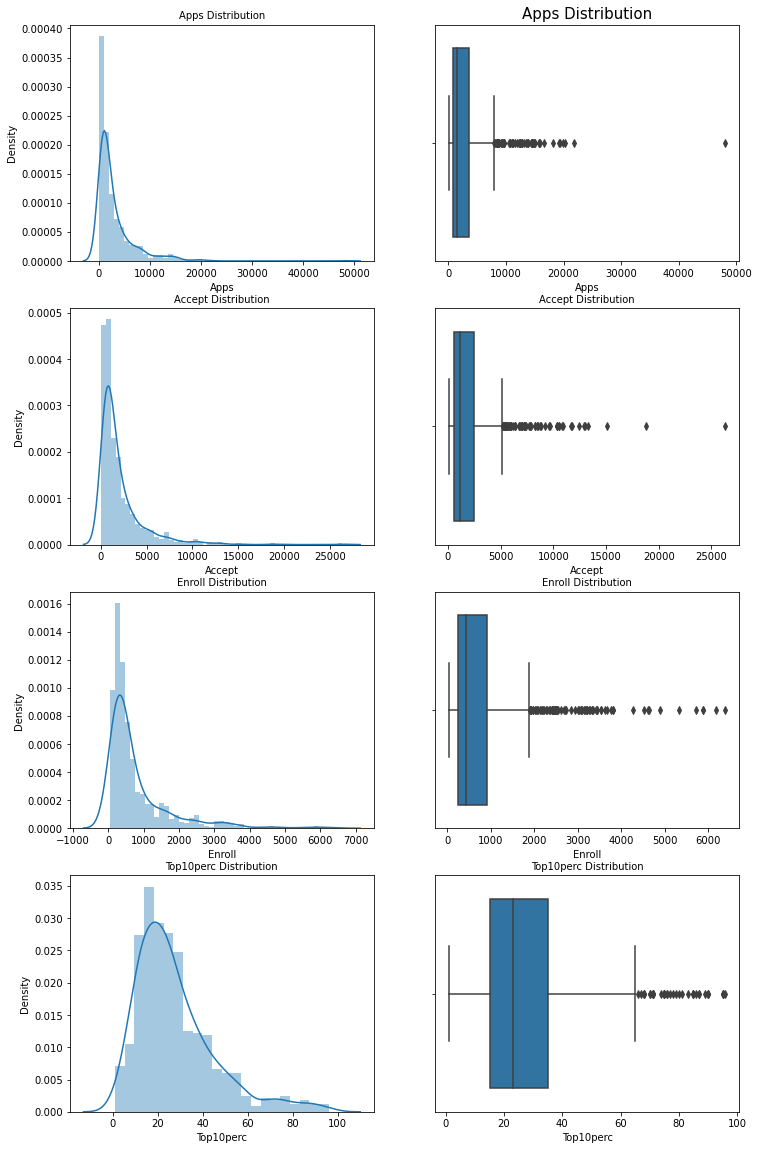

In [243]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)


a = sns.distplot(df1['Apps'] , ax=axes[0][0])
a.set_title("Apps Distribution",fontsize=10)

a = sns.boxplot(df1['Apps'] , orient = "v" , ax=axes[0][1])
a.set_title("Apps Distribution",fontsize=15)

a = sns.distplot(df1['Accept'] , ax=axes[1][0])
a.set_title("Accept Distribution",fontsize=10)

a = sns.boxplot(df1['Accept'] , orient = "v" , ax=axes[1][1])
a.set_title("Accept Distribution",fontsize=10)

a = sns.distplot(df1['Enroll'] , ax=axes[2][0])
a.set_title("Enroll Distribution",fontsize=10)

a = sns.boxplot(df1['Enroll'] , orient = "v" , ax=axes[2][1])
a.set_title("Enroll Distribution",fontsize=10)

a = sns.distplot(df1['Top10perc'] , ax=axes[3][0])
a.set_title("Top10perc Distribution",fontsize=10)

a = sns.boxplot(df1['Top10perc'] , orient = "v" , ax=axes[3][1])
a.set_title("Top10perc Distribution",fontsize=10)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will

Text(0.5, 1.0, 'Outstate Distribution')

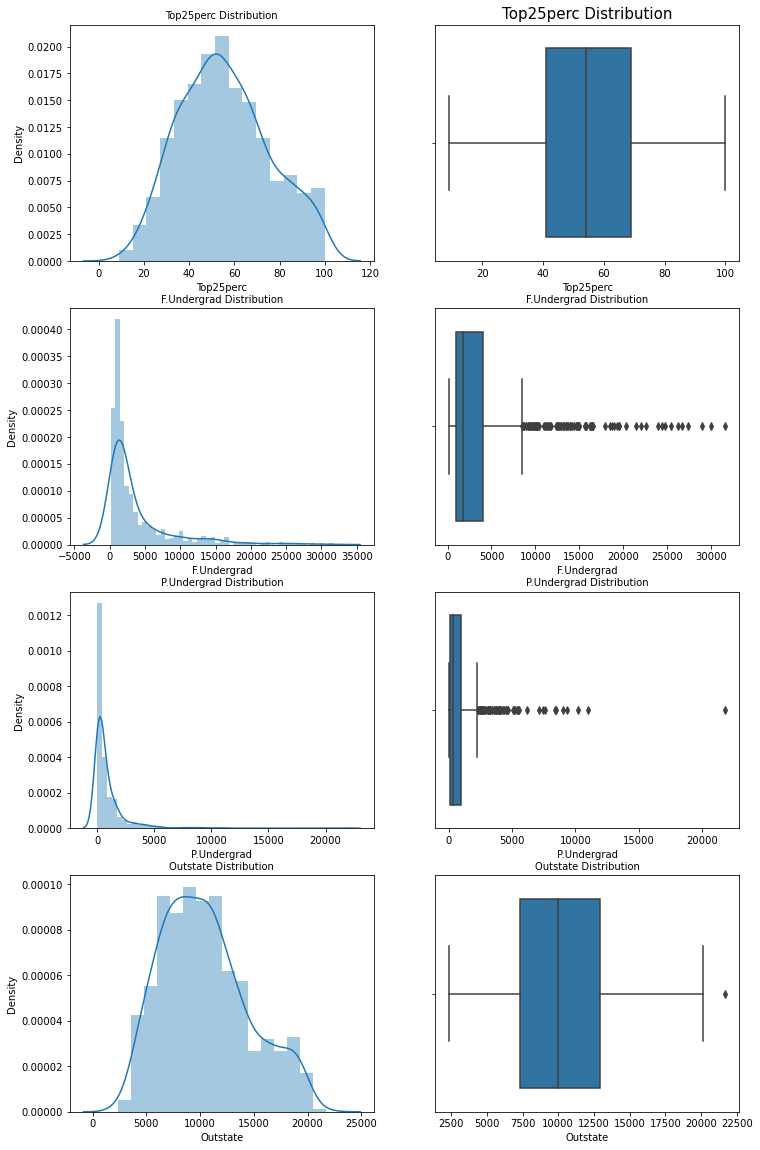

In [244]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df1['Top25perc'] , ax=axes[0][0])
a.set_title("Top25perc Distribution",fontsize=10)

a = sns.boxplot(df1['Top25perc'] , orient = "v" , ax=axes[0][1])
a.set_title("Top25perc Distribution",fontsize=15)

a = sns.distplot(df1['F.Undergrad'] , ax=axes[1][0])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.boxplot(df1['F.Undergrad'] , orient = "v" , ax=axes[1][1])
a.set_title("F.Undergrad Distribution",fontsize=10)

a = sns.distplot(df1['P.Undergrad'] , ax=axes[2][0])
a.set_title("P.Undergrad Distribution",fontsize=10)

a = sns.boxplot(df1['P.Undergrad'] , orient = "v" , ax=axes[2][1])
a.set_title("P.Undergrad Distribution",fontsize=10)

a = sns.distplot(df1['Outstate'] , ax=axes[3][0])
a.set_title("Outstate Distribution",fontsize=10)

a = sns.boxplot(df1['Outstate'] , orient = "v" , ax=axes[3][1])
a.set_title("Outstate Distribution",fontsize=10)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will

Text(0.5, 1.0, 'PhD Distribution')

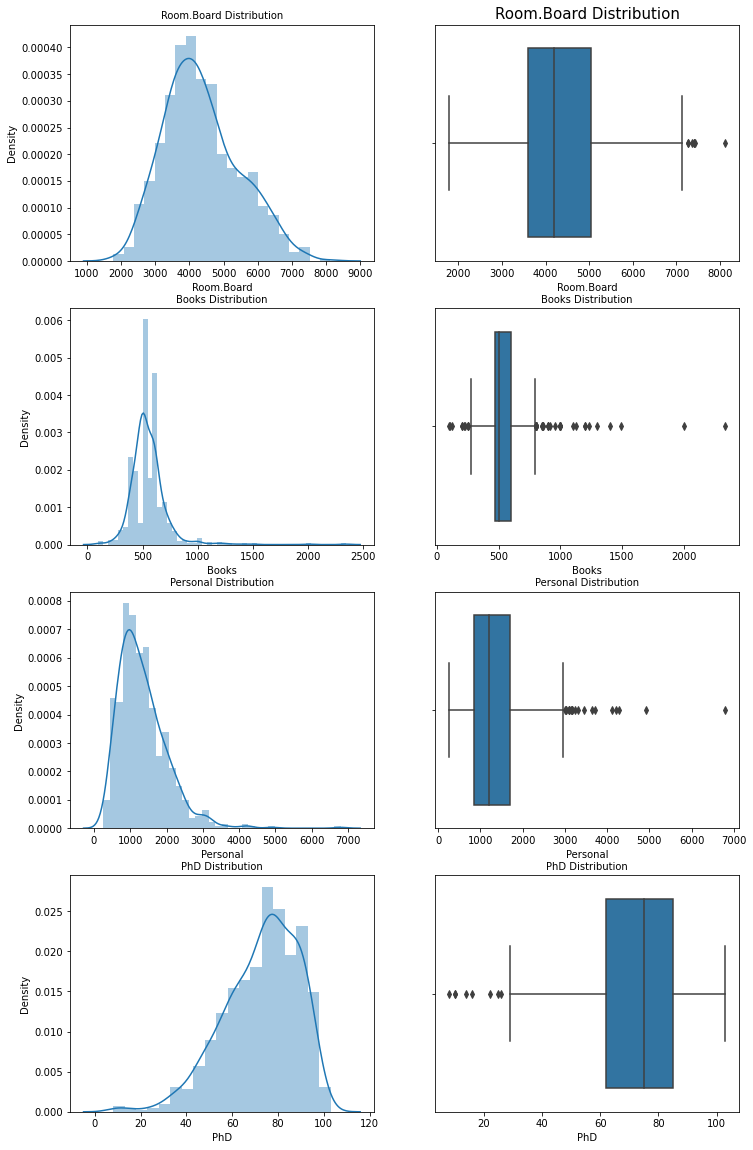

In [245]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(df1['Room.Board'] , ax=axes[0][0])
a.set_title("Room.Board Distribution",fontsize=10)

a = sns.boxplot(df1['Room.Board'] , orient = "v" , ax=axes[0][1])
a.set_title("Room.Board Distribution",fontsize=15)

a = sns.distplot(df1['Books'] , ax=axes[1][0])
a.set_title("Books Distribution",fontsize=10)

a = sns.boxplot(df1['Books'] , orient = "v" , ax=axes[1][1])
a.set_title("Books Distribution",fontsize=10)

a = sns.distplot(df1['Personal'] , ax=axes[2][0])
a.set_title("Personal Distribution",fontsize=10)

a = sns.boxplot(df1['Personal'] , orient = "v" , ax=axes[2][1])
a.set_title("Personal Distribution",fontsize=10)

a = sns.distplot(df1['PhD'] , ax=axes[3][0])
a.set_title("PhD Distribution",fontsize=10)

a = sns.boxplot(df1['PhD'] , orient = "v" , ax=axes[3][1])
a.set_title("PhD Distribution",fontsize=10)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will

Text(0.5, 1.0, 'Grad.Rate Distribution')

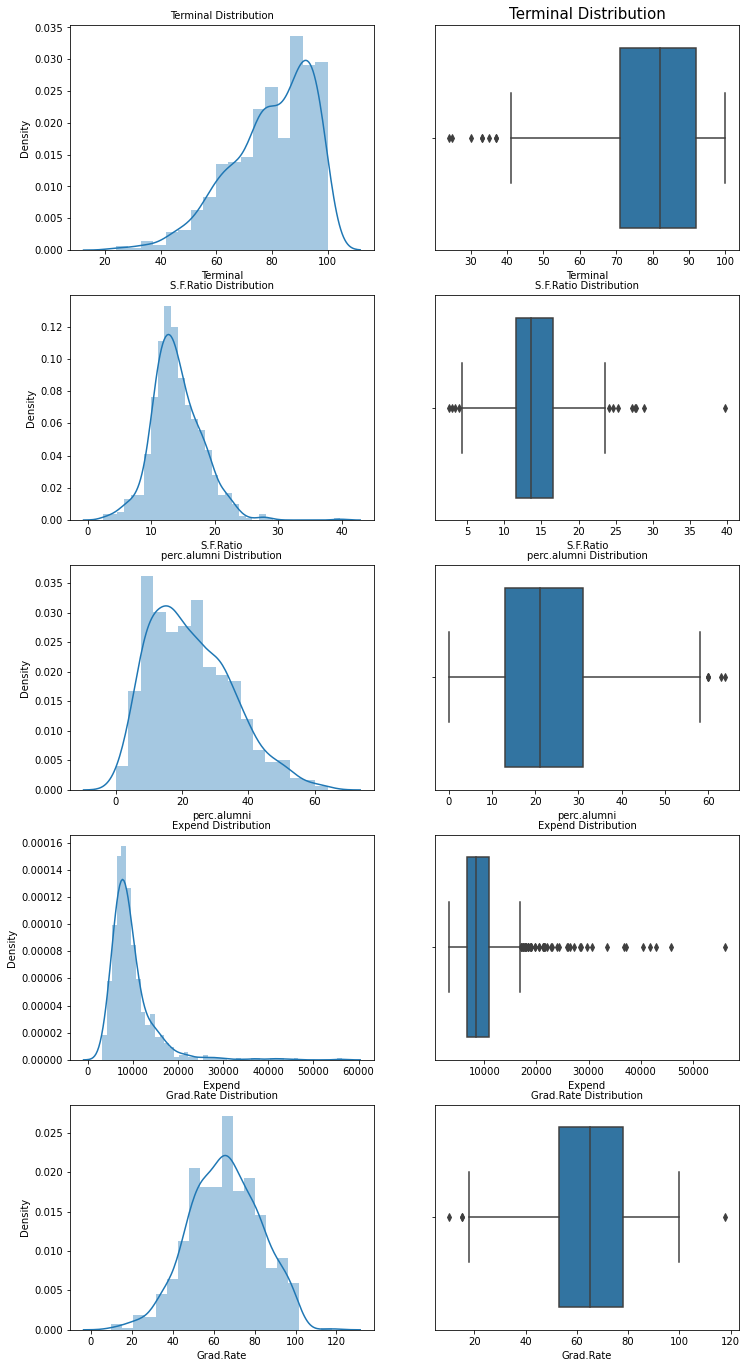

In [246]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(12, 24)
a = sns.distplot(df1['Terminal'] , ax=axes[0][0])
a.set_title("Terminal Distribution",fontsize=10)

a = sns.boxplot(df1['Terminal'] , orient = "v" , ax=axes[0][1])
a.set_title("Terminal Distribution",fontsize=15)

a = sns.distplot(df1['S.F.Ratio'] , ax=axes[1][0])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.boxplot(df1['S.F.Ratio'] , orient = "v" , ax=axes[1][1])
a.set_title("S.F.Ratio Distribution",fontsize=10)

a = sns.distplot(df1['perc.alumni'] , ax=axes[2][0])
a.set_title("perc.alumni Distribution",fontsize=10)

a = sns.boxplot(df1['perc.alumni'] , orient = "v" , ax=axes[2][1])
a.set_title("perc.alumni Distribution",fontsize=10)

a = sns.distplot(df1['Expend'] , ax=axes[3][0])
a.set_title("Expend Distribution",fontsize=10)

a = sns.boxplot(df1['Expend'] , orient = "v" , ax=axes[3][1])
a.set_title("Expend Distribution",fontsize=10)

a = sns.distplot(df1['Grad.Rate'] , ax=axes[4][0])
a.set_title("Grad.Rate Distribution",fontsize=10)

a = sns.boxplot(df1['Grad.Rate'] , orient = "v" , ax=axes[4][1])
a.set_title("Grad.Rate Distribution",fontsize=10)

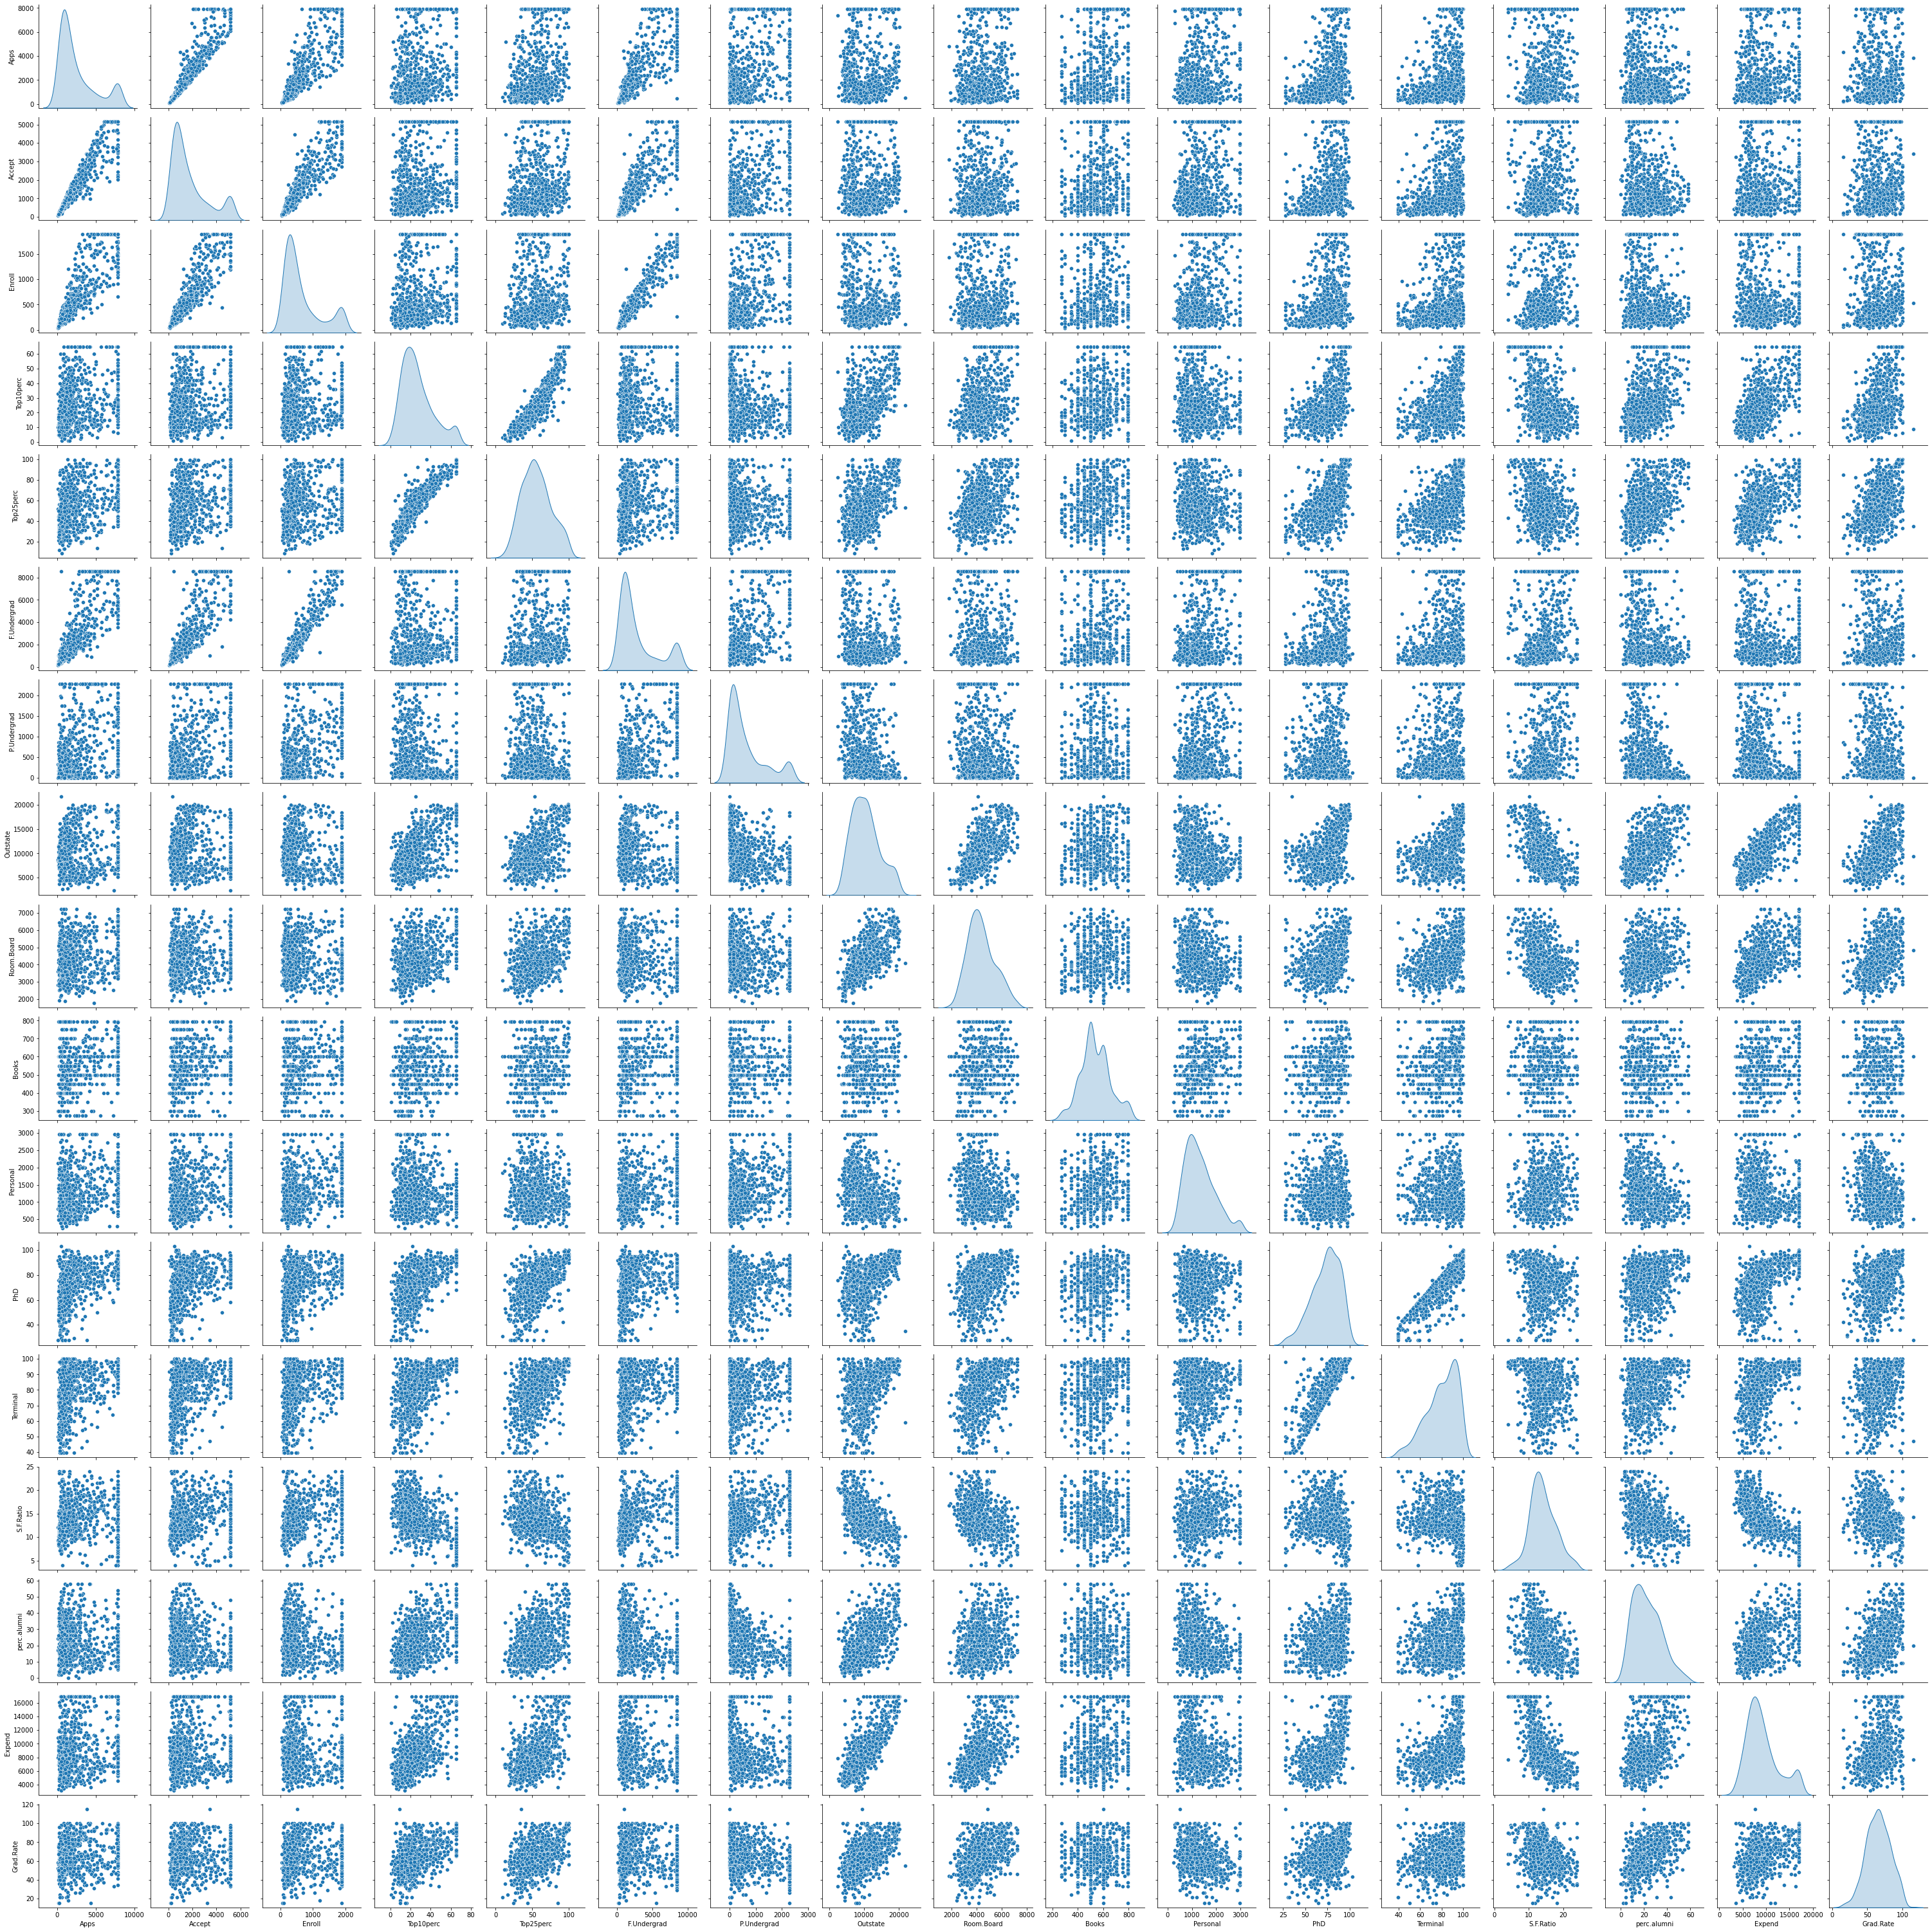

In [293]:
sns.pairplot(df1, diag_kind='kde')

In [248]:
df1_new = df1.corr()
df1_new

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

<AxesSubplot:>

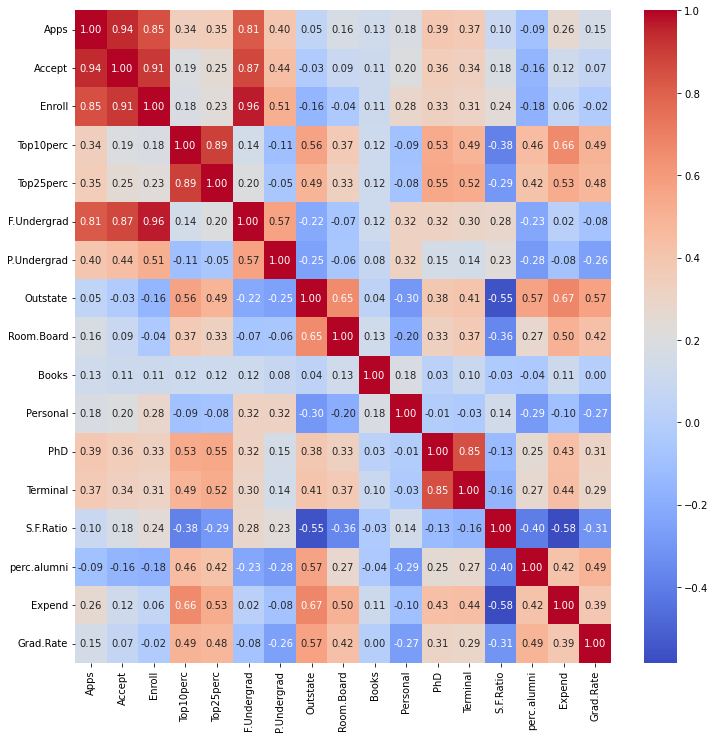

In [249]:
plt.figure(figsize=(12,12))
sns.heatmap(df1_new, annot=True, fmt = '.2f', cmap='coolwarm')

# 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [250]:
df1_new = df1.drop(['Names'], axis =1)

In [251]:
from scipy.stats import zscore

df1_z=df1_new.apply(zscore)
df1_z.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [294]:
df1_z.describe().T

count          mean       std       min       25%       50%  \
Apps         777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept       777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll       777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc    777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc    777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad  777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad  777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate     777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board   777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books        777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal     777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD          777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal     777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio    777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni  777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend       777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate    777.0  3.886495e-16  1.000644 -3.230876 -0.726019 -0.026990   

                  75%        max  
Apps         0.160912  11.658671  
Accept       0.165417   9.924816  
Enroll       0.131413   6.043678  
Top10perc    0.422113   3.882319  
Top25perc    0.667104   2.233391  
F.Undergrad  0.062941   5.764674  
P.Undergrad  0.073418  13.789921  
Outstate     0.617927   2.800531  
Room.Board   0.631824   3.436593  
Books        0.306784  10.852297  
Personal     0.531095   8.068387  
PhD          0.756222   1.859323  
Terminal     0.835818   1.379560  
S.F.Ratio    0.609307   6.499390  
perc.alumni  0.666685   3.331452  
Expend       0.224174   8.924721  
Grad.Rate    0.730293   3.060392

# 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

In [253]:
cov_matrix = np.cov(df1_z.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441

In [297]:
df1_z1 = df1_z.corr()
df1_z1

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps         1.000000  0.943451  0.846822   0.338834   0.351640     0.814491   
Accept       0.943451  1.000000  0.911637   0.192447   0.247476     0.874223   
Enroll       0.846822  0.911637  1.000000   0.181294   0.226745     0.964640   
Top10perc    0.338834  0.192447  0.181294   1.000000   0.891995     0.141289   
Top25perc    0.351640  0.247476  0.226745   0.891995   1.000000     0.199445   
F.Undergrad  0.814491  0.874223  0.964640   0.141289   0.199445     1.000000   
P.Undergrad  0.398264  0.441271  0.513069  -0.105356  -0.053577     0.570512   
Outstate     0.050159 -0.025755 -0.155477   0.562331   0.489394    -0.215742   
Room.Board   0.164939  0.090899 -0.040232   0.371480   0.331490    -0.068890   
Books        0.132559  0.113525  0.112711   0.118858   0.115527     0.115550   
Personal     0.178731  0.200989  0.280929  -0.093316  -0.080810     0.317200   
PhD          0.390697  0.355758  0.331469   0.531828   0.545862     0.318337   
Terminal     0.369491  0.337583  0.308274   0.491135   0.524749     0.300019   
S.F.Ratio    0.095633  0.176229  0.237271  -0.384875  -0.294629     0.279703   
perc.alumni -0.090226 -0.159990 -0.180794   0.455485   0.417864    -0.229462   
Expend       0.259592  0.124717  0.064169   0.660913   0.527447     0.018652   
Grad.Rate    0.146755  0.067313 -0.022341   0.494989   0.477281    -0.078773   

             P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  \
Apps            0.398264  0.050159    0.164939  0.132559  0.178731  0.390697   
Accept          0.441271 -0.025755    0.090899  0.113525  0.200989  0.355758   
Enroll          0.513069 -0.155477   -0.040232  0.112711  0.280929  0.331469   
Top10perc      -0.105356  0.562331    0.371480  0.118858 -0.093316  0.531828   
Top25perc      -0.053577  0.489394    0.331490  0.115527 -0.080810  0.545862   
F.Undergrad     0.570512 -0.215742   -0.068890  0.115550  0.317200  0.318337   
P.Undergrad     1.000000 -0.253512   -0.061326  0.081200  0.319882  0.149114   
Outstate       -0.253512  1.000000    0.654256  0.038855 -0.299087  0.382982   
Room.Board     -0.061326  0.654256    1.000000  0.127963 -0.199428  0.329202   
Books           0.081200  0.038855    0.127963  1.000000  0.179295  0.026906   
Personal        0.319882 -0.299087   -0.199428  0.179295  1.000000 -0.010936   
PhD             0.149114  0.382982    0.329202  0.026906 -0.010936  1.000000   
Terminal        0.141904  0.407983    0.374540  0.099955 -0.030613  0.849587   
S.F.Ratio       0.232531 -0.554821   -0.362628 -0.031929  0.136345 -0.130530   
perc.alumni    -0.280792  0.566262    0.272363 -0.040208 -0.285968  0.249009   
Expend         -0.083568  0.672779    0.501739  0.112409 -0.097892  0.432762   
Grad.Rate      -0.257001  0.571290    0.424942  0.001061 -0.269344  0.305038   

             Terminal  S.F.Ratio  perc.alumni    Expend  Grad.Rate  
Apps         0.369491   0.095633    -0.090226  0.259592   0.146755  
Accept       0.337583   0.176229    -0.159990  0.124717   0.067313  
Enroll       0.308274   0.237271    -0.180794  0.064169  -0.022341  
Top10perc    0.491135  -0.384875     0.455485  0.660913   0.494989  
Top25perc    0.524749  -0.294629     0.417864  0.527447   0.477281  
F.Undergrad  0.300019   0.279703    -0.229462  0.018652  -0.078773  
P.Undergrad  0.141904   0.232531    -0.280792 -0.083568  -0.257001  
Outstate     0.407983  -0.554821     0.566262  0.672779   0.571290  
Room.Board   0.374540  -0.362628     0.272363  0.501739   0.424942  
Books        0.099955  -0.031929    -0.040208  0.112409   0.001061  
Personal    -0.030613   0.136345    -0.285968 -0.097892  -0.269344  
PhD          0.849587  -0.130530     0.249009  0.432762   0.305038  
Terminal     1.000000  -0.160104     0.267130  0.438799   0.289527  
S.F.Ratio   -0.160104   1.000000    -0.402929 -0.583832  -0.306710  
perc.alumni  0.267130  -0.402929     1.000000  0.417712   0.490898  
Expend       0.438799  -0.58383

<AxesSubplot:>

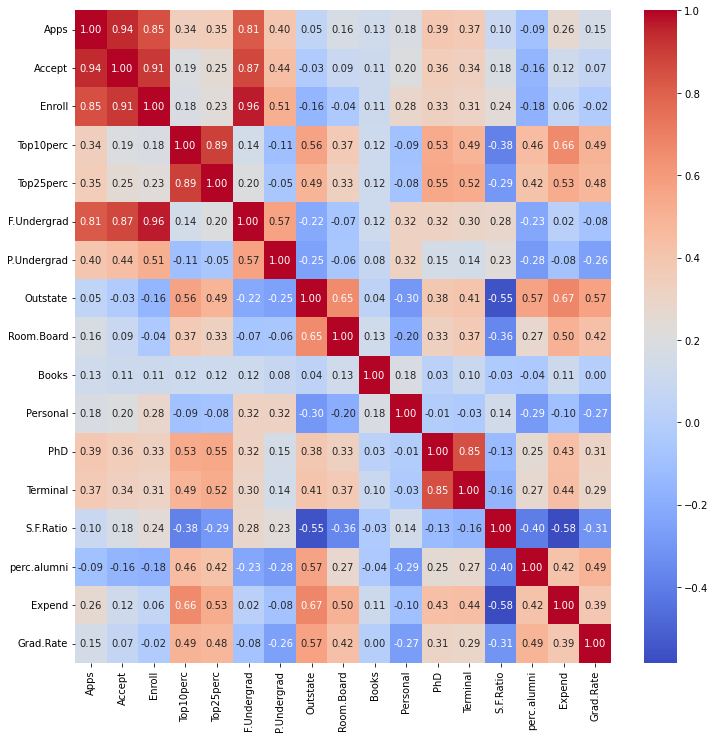

In [298]:
plt.figure(figsize=(12,12))
sns.heatmap(df1_z1, annot=True, fmt = '.2f', cmap='coolwarm')

# 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

<AxesSubplot:>

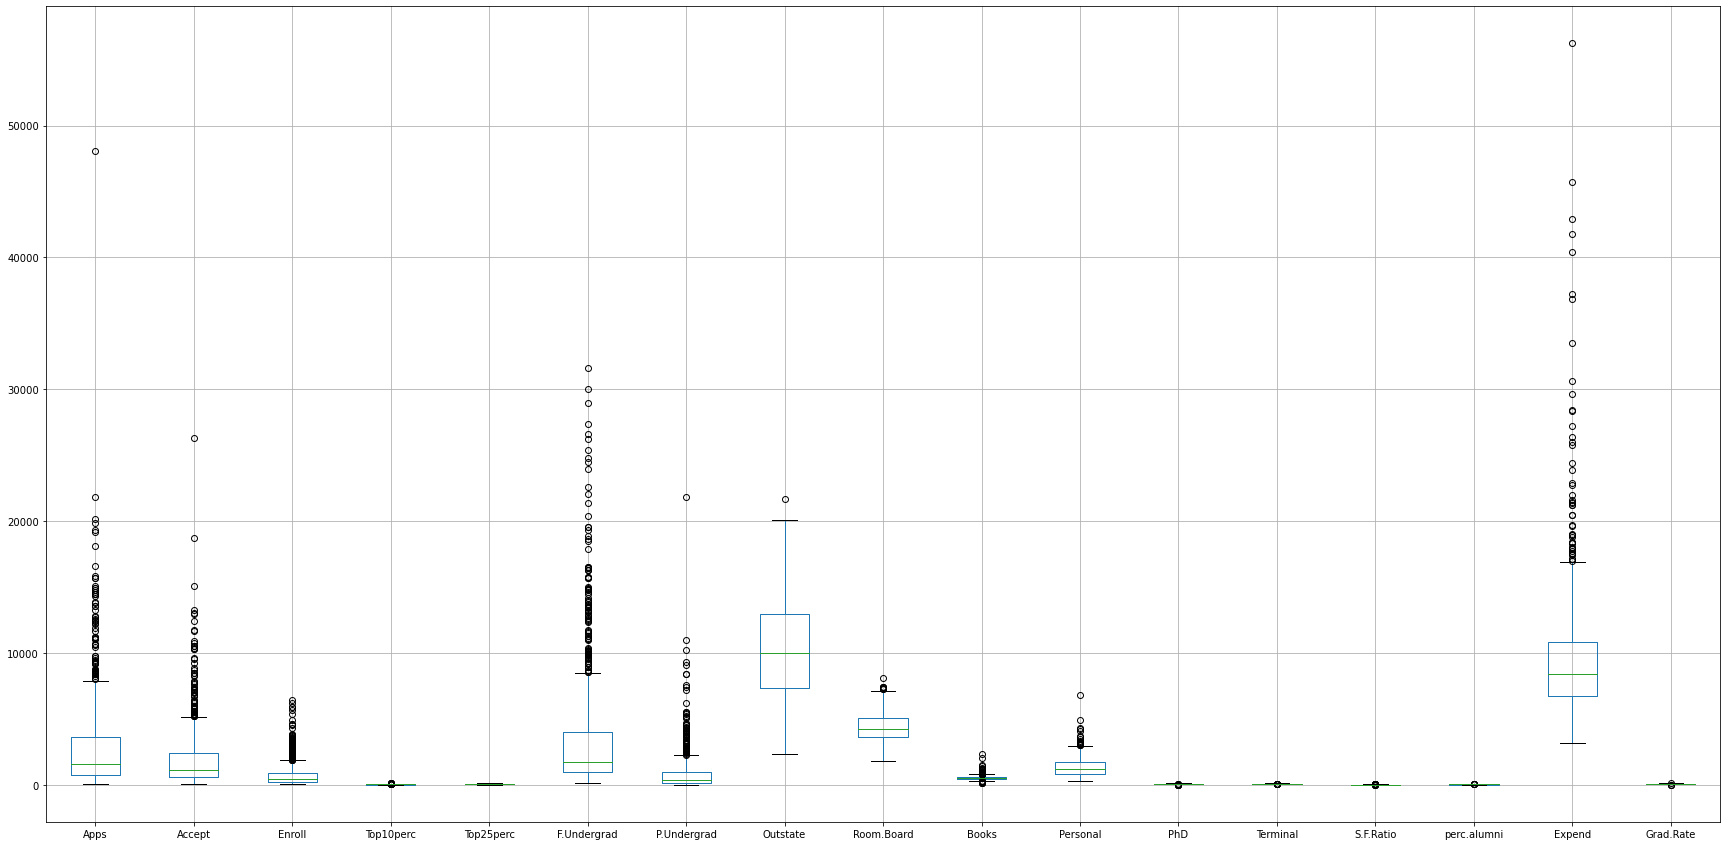

In [255]:
df1.boxplot(figsize=(30,15))

<AxesSubplot:>

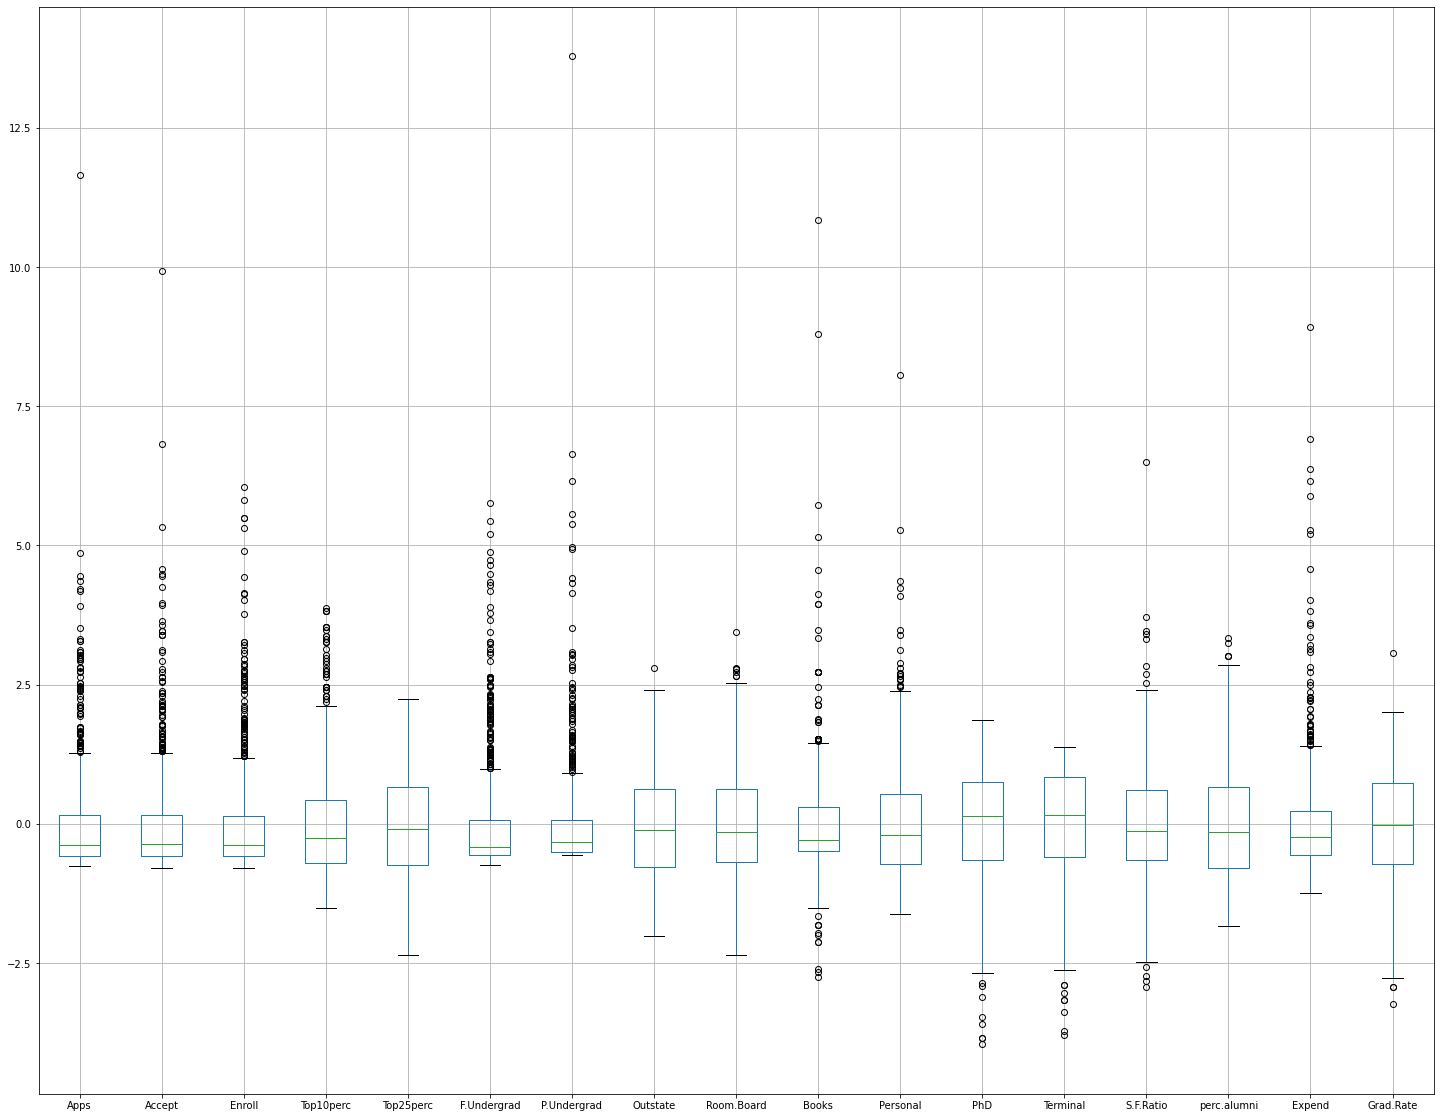

In [256]:
df1_z.boxplot(figsize=(25,20))

In [257]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [258]:
lratio,uratio=remove_outlier(df1['Apps'])
df1['Apps']=np.where(df1['Apps']>uratio,uratio,df1['Apps'])
df1['Apps']=np.where(df1['Apps']<lratio,lratio,df1['Apps'])

lratio,uratio=remove_outlier(df1['Accept'])
df1['Accept']=np.where(df1['Accept']>uratio,uratio,df1['Accept'])
df1['Accept']=np.where(df1['Accept']<lratio,lratio,df1['Accept'])

lratio,uratio=remove_outlier(df1['Enroll'])
df1['Enroll']=np.where(df1['Enroll']>uratio,uratio,df1['Enroll'])
df1['Enroll']=np.where(df1['Enroll']<lratio,lratio,df1['Enroll'])

lratio,uratio=remove_outlier(df1['Top10perc'])
df1['Top10perc']=np.where(df1['Top10perc']>uratio,uratio,df1['Top10perc'])
df1['Top10perc']=np.where(df1['Top10perc']<lratio,lratio,df1['Top10perc'])

lratio,uratio=remove_outlier(df1['F.Undergrad'])
df1['F.Undergrad']=np.where(df1['F.Undergrad']>uratio,uratio,df1['F.Undergrad'])
df1['F.Undergrad']=np.where(df1['F.Undergrad']<lratio,lratio,df1['F.Undergrad'])

lratio,uratio=remove_outlier(df1['P.Undergrad'])
df1['P.Undergrad']=np.where(df1['P.Undergrad']>uratio,uratio,df1['P.Undergrad'])
df1['P.Undergrad']=np.where(df1['P.Undergrad']<lratio,lratio,df1['P.Undergrad'])

lratio,uratio=remove_outlier(df1['Room.Board'])
df1['Room.Board']=np.where(df1['Room.Board']>uratio,uratio,df1['Room.Board'])
df1['Room.Board']=np.where(df1['Room.Board']<lratio,lratio,df1['Room.Board'])

lratio,uratio=remove_outlier(df1['Books'])
df1['Books']=np.where(df1['Books']>uratio,uratio,df1['Books'])
df1['Books']=np.where(df1['Books']<lratio,lratio,df1['Books'])

lratio,uratio=remove_outlier(df1['Personal'])
df1['Personal']=np.where(df1['Personal']>uratio,uratio,df1['Personal'])
df1['Personal']=np.where(df1['Personal']<lratio,lratio,df1['Personal'])

lratio,uratio=remove_outlier(df1['PhD'])
df1['PhD']=np.where(df1['PhD']>uratio,uratio,df1['PhD'])
df1['PhD']=np.where(df1['PhD']<lratio,lratio,df1['PhD'])

lratio,uratio=remove_outlier(df1['Terminal'])
df1['Terminal']=np.where(df1['Terminal']>uratio,uratio,df1['Terminal'])
df1['Terminal']=np.where(df1['Terminal']<lratio,lratio,df1['Terminal'])

lratio,uratio=remove_outlier(df1['S.F.Ratio'])
df1['S.F.Ratio']=np.where(df1['S.F.Ratio']>uratio,uratio,df1['S.F.Ratio'])
df1['S.F.Ratio']=np.where(df1['S.F.Ratio']<lratio,lratio,df1['S.F.Ratio'])

lratio,uratio=remove_outlier(df1['perc.alumni'])
df1['perc.alumni']=np.where(df1['perc.alumni']>uratio,uratio,df1['perc.alumni'])
df1['perc.alumni']=np.where(df1['perc.alumni']<lratio,lratio,df1['perc.alumni'])

lratio,uratio=remove_outlier(df1['Expend'])
df1['Expend']=np.where(df1['Expend']>uratio,uratio,df1['Expend'])
df1['Expend']=np.where(df1['Expend']<lratio,lratio,df1['Expend'])

lratio,uratio=remove_outlier(df1['Grad.Rate'])
df1['Grad.Rate']=np.where(df1['Grad.Rate']>uratio,uratio,df1['Grad.Rate'])
df1['Grad.Rate']=np.where(df1['Grad.Rate']<lratio,lratio,df1['Grad.Rate'])


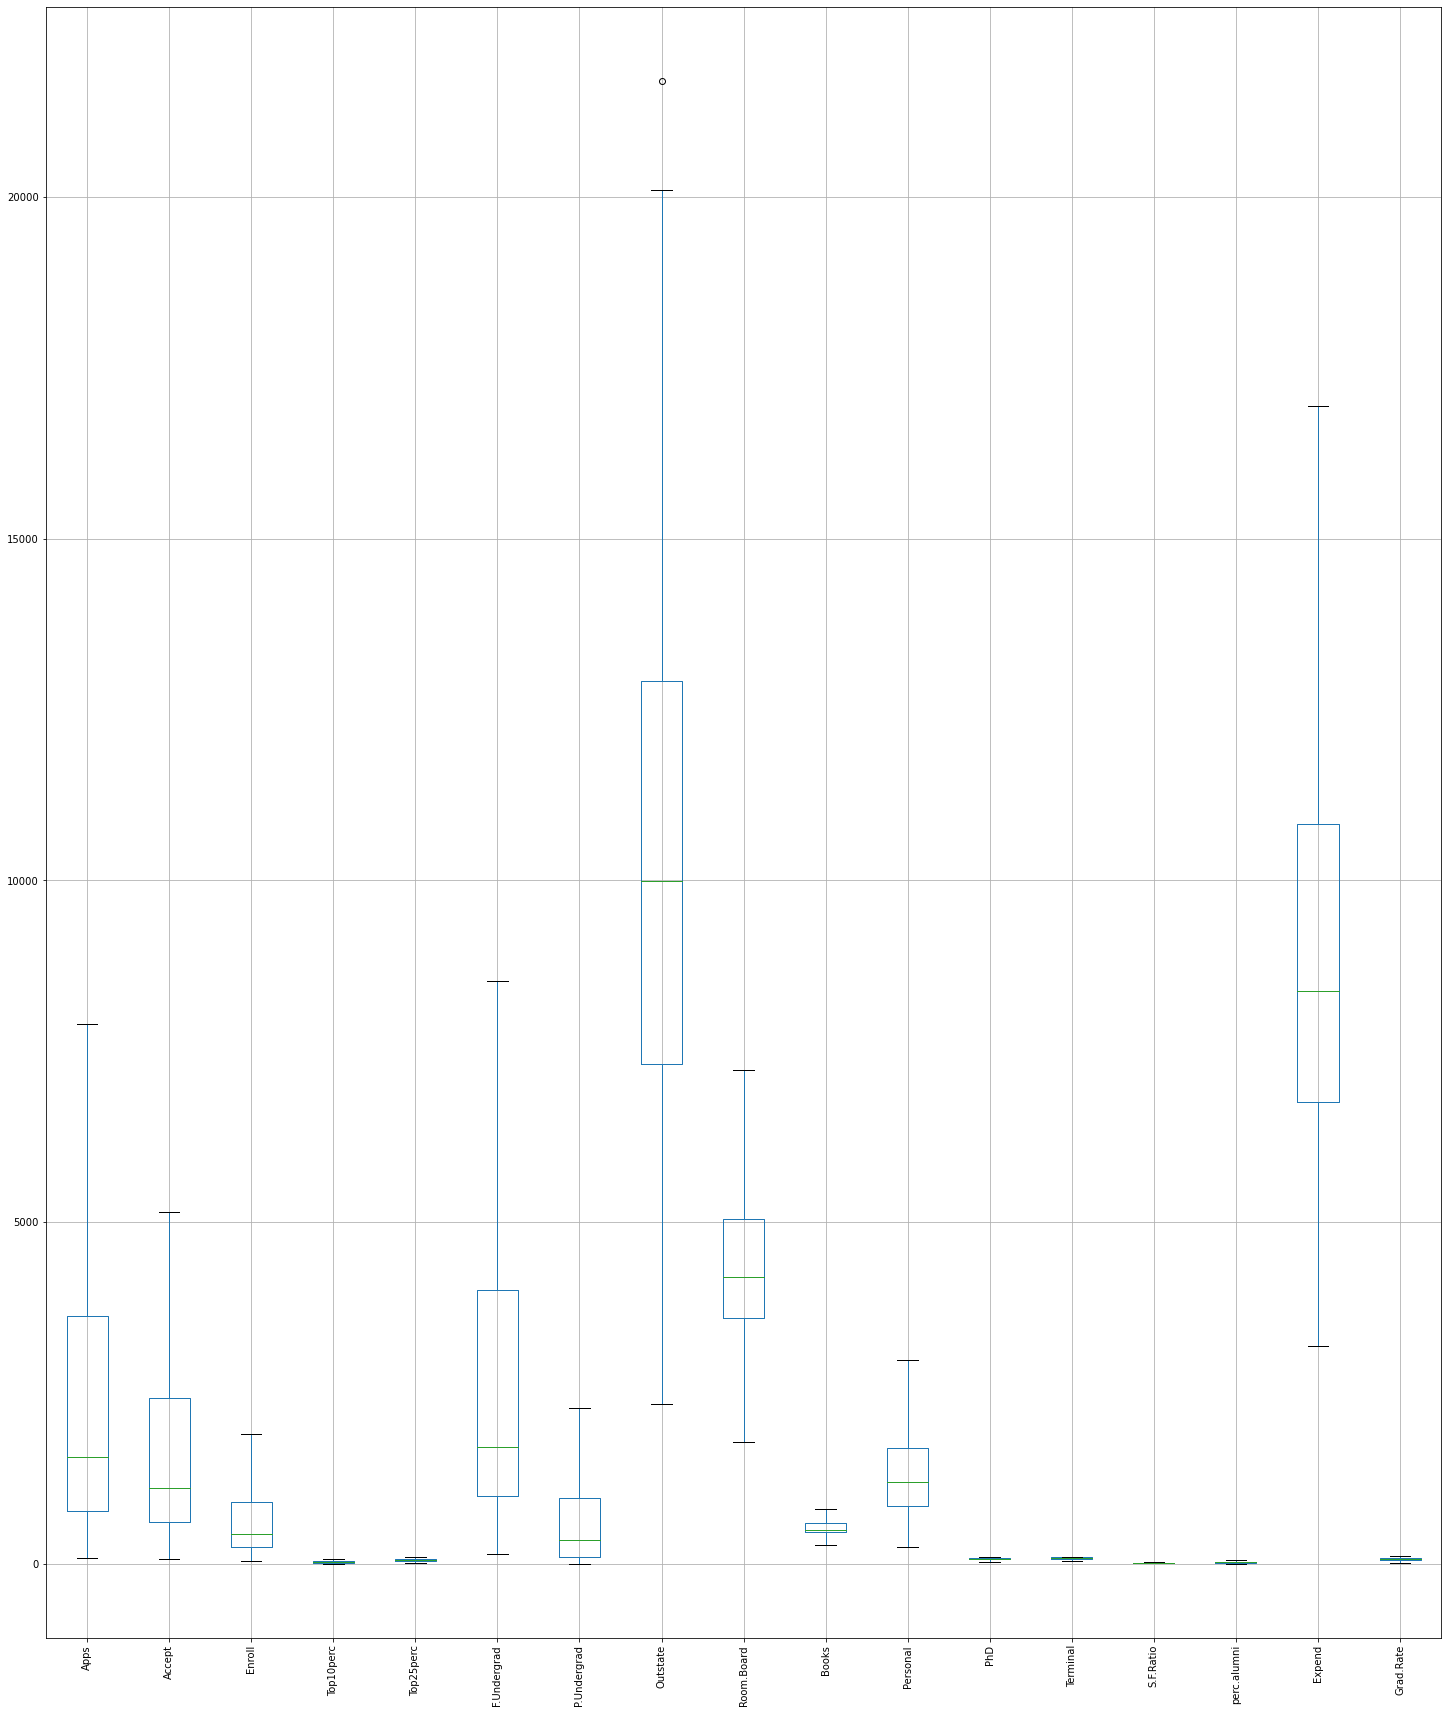

In [259]:
plt.subplots(figsize=(25,30))
df1.boxplot(figsize=(25,20))
plt.xticks(rotation=90)
plt.show()

# 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [260]:
from scipy.stats import zscore
df1_new_z=df1_new.apply(zscore)
df1_new_z.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   1.013776    -0.867574 -0.501910  -0.318252  
1  -0.477704    -0.544572  0.166110  -0.551262  
2  -0.300749     0.585935 -0.177290  -0.667767  
3  -1.615274     1.151188  1.792851  -0.376504  
4  -0.553542    -1.675079  0.241803  -2.939613

In [261]:
df1_new_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Apps         777 non-null    float64
 1   Accept       777 non-null    float64
 2   Enroll       777 non-null    float64
 3   Top10perc    777 non-null    float64
 4   Top25perc    777 non-null    float64
 5   F.Undergrad  777 non-null    float64
 6   P.Undergrad  777 non-null    float64
 7   Outstate     777 non-null    float64
 8   Room.Board   777 non-null    float64
 9   Books        777 non-null    float64
 10  Personal     777 non-null    float64
 11  PhD          777 non-null    float64
 12  Terminal     777 non-null    float64
 13  S.F.Ratio    777 non-null    float64
 14  perc.alumni  777 non-null    float64
 15  Expend       777 non-null    float64
 16  Grad.Rate    777 non-null    float64
dtypes: float64(17)
memory usage: 103.3 KB


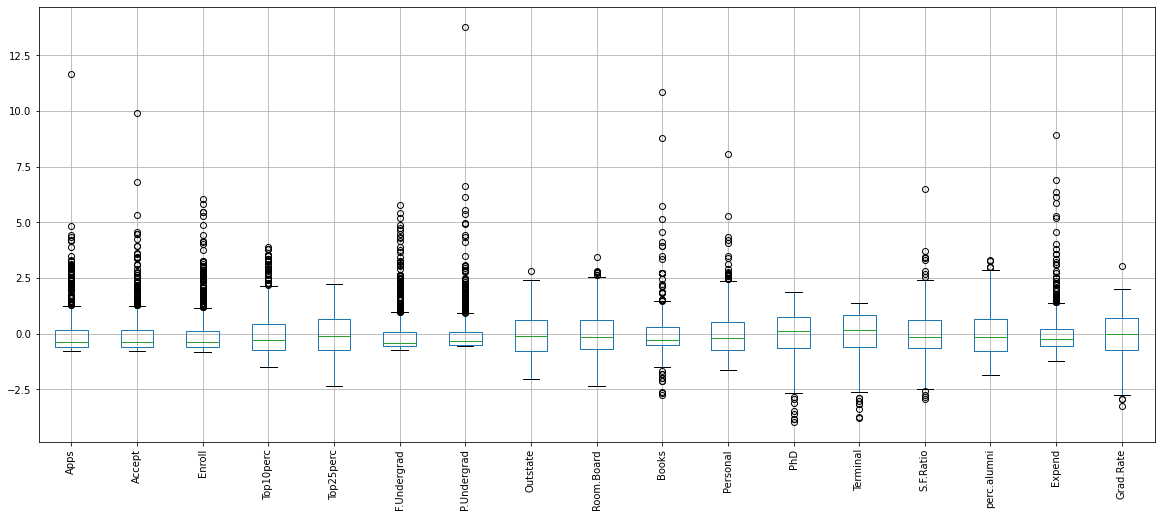

In [262]:
df1_new_z.boxplot(figsize=(20,8))
plt.xticks(rotation=90)
plt.show()

In [263]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df1_new_z)
p_value

0.0

There are significant corelation

In [264]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1_new_z)
kmo_model

0.8131251200373522

adequacy sample size is good as the above value is more than 0.7

In [265]:
from sklearn.decomposition import PCA
pca = PCA(n_components=17, random_state=123)
df_pca = pca.fit_transform(df1_new_z)
df_pca.transpose()


array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [ 1.75239502e-03,  1.03709803e-01, -2.25582869e-02, ...,
         6.79013123e-02,  3.53597440e-01, -1.14873492e-01],
       [-9.31400698e-02, -5.02556890e-02, -4.05268301e-03, ...,
        -2.32023970e-01,  3.04416200e-01, -1.17076127e-01],
       [ 9.35522023e-02, -1.74057054e-01,  3.75875882e-03, ...,
        -9.99380421e-02,  3.35104811e-01, -2.57218339e-03]])

In [266]:
#eigan Vectors
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [267]:
#Eigan Values
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

# 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [268]:
#explained varience of each PC
var_exp=pca.explained_variance_ratio_
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [269]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [270]:
df_pca_loading = pd.DataFrame(pca.components_,columns=list(df1_new_z))
df_pca_loading

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0   0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1   0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2  -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3   0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4   0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5  -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   
6  -0.042486 -0.012950 -0.027693  -0.161332  -0.118486    -0.025076   
7  -0.103090 -0.056271  0.058662  -0.122678  -0.102492     0.078890   
8  -0.090227 -0.177865 -0.128561   0.341100   0.403712    -0.059442   
9   0.052510  0.041140  0.034488   0.064026   0.014549     0.020847   
10  0.043046 -0.058406 -0.069399  -0.008105  -0.273128    -0.081158   
11  0.024071 -0.145102  0.011143   0.038554  -0.089352     0.056177   
12  0.595831  0.292642 -0.444638   0.001023   0.021884    -0.523622   
13  0.080633  0.033467 -0.085697  -0.107828   0.151742    -0.056373   
14  0.133406 -0.145498  0.029590   0.697723  -0.617275     0.009916   
15  0.459139 -0.518569 -0.404318  -0.148739   0.051868     0.560363   
16  0.358970 -0.543427  0.609651  -0.144986   0.080348    -0.414705   

    P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0      0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1      0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2      0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3     -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4      0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5     -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   
6      0.061042  0.108529    0.209744 -0.149692  0.633790 -0.001096 -0.028477   
7      0.570784  0.009846   -0.221453  0.213293 -0.232661 -0.077040 -0.012161   
8      0.560673 -0.004573    0.275023 -0.133663 -0.094469 -0.185182 -0.254938   
9     -0.223106  0.186675    0.298324 -0.082029  0.136028 -0.123452 -0.088578   
10     0.100693  0.143221   -0.359322  0.031940 -0.018578  0.040372 -0.058973   
11    -0.063536 -0.823444    0.354560 -0.028159 -0.039264  0.023222  0.016485   
12     0.125998 -0.141856   -0.069749  0.011438  0.039455  0.127696 -0.058313   
13     0.019286 -0.034012   -0.058429 -0.066849  0.027529 -0.691126  0.671009   
14     0.020952  0.038354    0.003402 -0.009439 -0.003090 -0.112056  0.158910   
15    -0.052731  0.101595   -0.025929  0.002883 -0.012890  0.029808 -0.027076   
16     0.009018  0.050900    0.001146  0.000773 -0.001114  0.013813  0.006209   

    S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0   -0.176958     0.205082  0.318909   0.252316  
1    0.246665    -0.246595 -0.131690  -0.169241  
2   -0.289848    -0.146989  0.226744  -0.208065  
3   -0.161189     0.017314  0.079273   0.269129  
4   -0.079388    -0.216297  0.075958  -0.109268  
5    0.487046    -0.047340 -0.298119   0.216163  
6    0.219259     0.243321 -0.226584   0.559944  
7   -0.083605     0.678524 -0.054159  -0.005336  
8    0.274544    -0.255335 -0.049139   0.041904  
9    0.472045     0.423000  0.132286  -0.590271  
10   0.445001    -0.130728  0.692089   0.219839  
11  -0.011026     0.182661  0.325982   0.122107  
12  -0.017715     0.104088 -0.093746  -0.069197  
13   0.041374    -0.027154  0.073123   0.036477  
14  -0.020899    -0.008418 -0.227742  -0.003394  
15  -0.021248     0.003334 -0.043880  -0.005008  
16  -0.002222    -0.019187 -0.035310  -0.013071

# 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

In [271]:
#Eigan Values
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [272]:
df1_new_z.columns

Index(['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')

In [273]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [299]:
print('The Linear equation of 1st component: ')
for i in range(0,df1_new_z.shape[1]):
    print('{} * {}'.format(np.round(pca.components_[0][i],2),df1_new_z.columns[i]),end=' + ')

The Linear equation of 1st component: 
0.25 * Apps + 0.21 * Accept + 0.18 * Enroll + 0.35 * Top10perc + 0.34 * Top25perc + 0.15 * F.Undergrad + 0.03 * P.Undergrad + 0.29 * Outstate + 0.25 * Room.Board + 0.06 * Books + -0.04 * Personal + 0.32 * PhD + 0.32 * Terminal + -0.18 * S.F.Ratio + 0.21 * perc.alumni + 0.32 * Expend + 0.25 * Grad.Rate + 

# 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [275]:
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12','PC13','PC14','PC15','PC16','PC17'],
                                    index = df1_new_z.columns)
df_extracted_loadings

PC1       PC2       PC3       PC4       PC5       PC6  \
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237   
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535   
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558   
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693   
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092   
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454   
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199   
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000   
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755   
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055   
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398   
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256   
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928   
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046   
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340   
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119   
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163   

                  PC7       PC8       PC9      PC10      PC11      PC12  \
Apps        -0.042486 -0.103090 -0.090227  0.052510  0.043046  0.024071   
Accept      -0.012950 -0.056271 -0.177865  0.041140 -0.058406 -0.145102   
Enroll      -0.027693  0.058662 -0.128561  0.034488 -0.069399  0.011143   
Top10perc   -0.161332 -0.122678  0.341100  0.064026 -0.008105  0.038554   
Top25perc   -0.118486 -0.102492  0.403712  0.014549 -0.273128 -0.089352   
F.Undergrad -0.025076  0.078890 -0.059442  0.020847 -0.081158  0.056177   
P.Undergrad  0.061042  0.570784  0.560673 -0.223106  0.100693 -0.063536   
Outstate     0.108529  0.009846 -0.004573  0.186675  0.143221 -0.823444   
Room.Board   0.209744 -0.221453  0.275023  0.298324 -0.359322  0.354560   
Books       -0.149692  0.213293 -0.133663 -0.082029  0.031940 -0.028159   
Personal     0.633790 -0.232661 -0.094469  0.136028 -0.018578 -0.039264   
PhD         -0.001096 -0.077040 -0.185182 -0.123452  0.040372  0.023222   
Terminal    -0.028477 -0.012161 -0.254938 -0.088578 -0.058973  0.016485   
S.F.Ratio    0.219259 -0.083605  0.274544  0.472045  0.445001 -0.011026   
perc.alumni  0.243321  0.678524 -0.255335  0.423000 -0.130728  0.182661   
Expend      -0.226584 -0.054159 -0.049139  0.132286  0.692089  0.325982   
Grad.Rate    0.559944 -0.005336  0.041904 -0.590271  0.219839  0.122107   

                 PC13      PC14      PC15      PC16      PC17  
Apps         0.595831  0.080633  0.133406  0.459139  0.358970  
Accept       0.292642  0.033467 -0.145498 -0.518569 -0.543427  
Enroll      -0.444638 -0.085697  0.029590 -0.404318  0.609651  
Top10perc    0.001023 -0.107828  0.697723 -0.148739 -0.144986  
Top25perc    0.021884  0.151742 -0.617275  0.051868  0.080348  
F.Undergrad -0.523622 -0.056373  0.009916  0.560363 -0.414705  
P.Undergrad  0.125998  0.019286  0.020952 -0.052731  0.009018  
Outstate    -0.141856 -0.034012  0.038354  0.101595  0.050900  
Room.Board  -0.069749 -0.058429  0.003402 -0.025929  0.001146  
Books        0.011438 -0.066849 -0.009439  0.002883  0.000773  
Personal     0.039455  0.027529 -0.003090 -0.012890 -0.001114  
PhD          0.127696 -0.691126 -0.112056  0.029808  0.013813  
Terminal    -0.058313  0.671009  0.158910 -0.027076  0.006209  
S.F.Ratio   -0.017715  0.041374 -0.020899 -0.021248 -0.002222  
perc.alumni  0.104088 -0.027154 -0.008418  0.003334 -0.019187  
Expend      -0.093746  0.073123 -0.227742 -0.043880 -0.035310  
Grad.Rate   -0.069197  0.036477 -0.003394 -0.005008 -0.013071

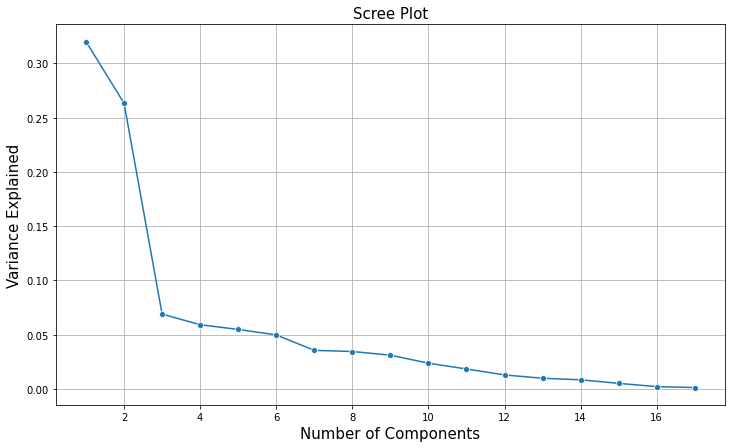

In [276]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [277]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

If we consider 85% of Varience, then we can choose 6 components.

In [278]:
#Choose the PCs basis cumulative explained variance
df1_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

#Check the selected PCs
df1_selected

PC1       PC2       PC3       PC4       PC5       PC6
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163

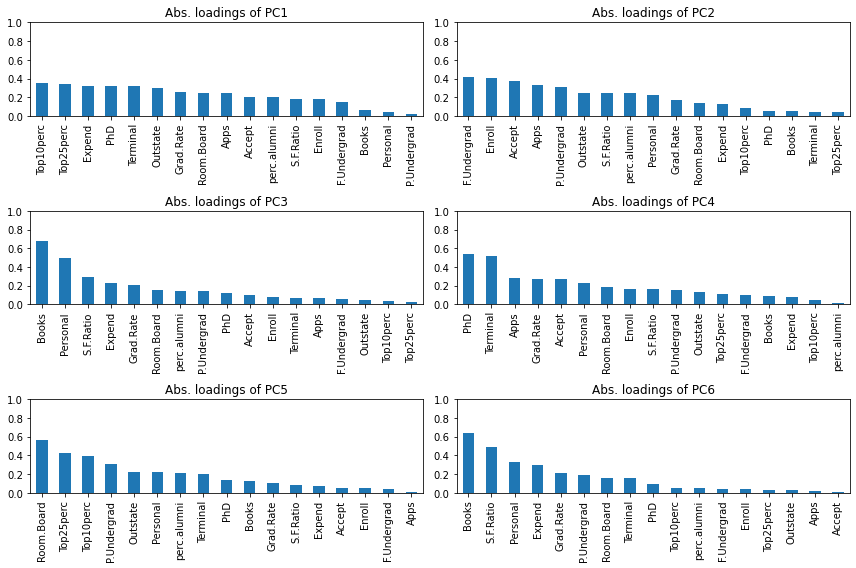

In [300]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values

plt.figure(figsize = (12,8))
for i in range(len(df1_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df1_selected[df1_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df1_selected.columns[i]))
    plt.tight_layout()

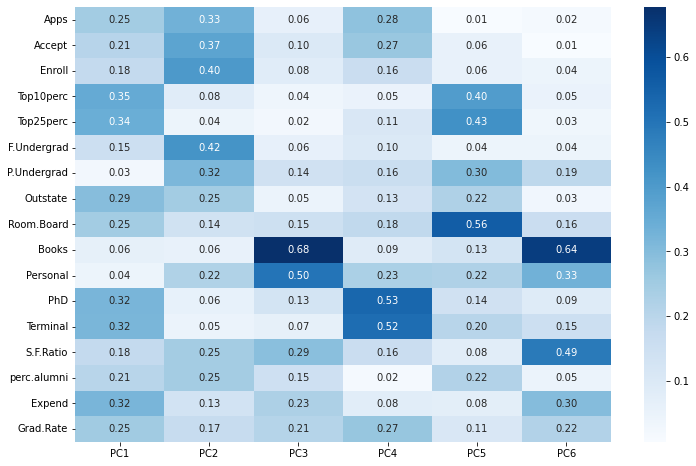

In [280]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df1_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [281]:
#In order to calculate PC scores we need loadings, below:
df1_selected

PC1       PC2       PC3       PC4       PC5       PC6
Apps         0.248766  0.331598 -0.063092  0.281311  0.005741 -0.016237
Accept       0.207602  0.372117 -0.101249  0.267817  0.055786  0.007535
Enroll       0.176304  0.403724 -0.082986  0.161827 -0.055694 -0.042558
Top10perc    0.354274 -0.082412  0.035056 -0.051547 -0.395434 -0.052693
Top25perc    0.344001 -0.044779 -0.024148 -0.109767 -0.426534  0.033092
F.Undergrad  0.154641  0.417674 -0.061393  0.100412 -0.043454 -0.043454
P.Undergrad  0.026443  0.315088  0.139682 -0.158558  0.302385 -0.191199
Outstate     0.294736 -0.249644  0.046599  0.131291  0.222532 -0.030000
Room.Board   0.249030 -0.137809  0.148967  0.184996  0.560919  0.162755
Books        0.064758  0.056342  0.677412  0.087089 -0.127289  0.641055
Personal    -0.042529  0.219929  0.499721 -0.230711 -0.222311 -0.331398
PhD          0.318313  0.058311 -0.127028 -0.534725  0.140166  0.091256
Terminal     0.317056  0.046429 -0.066038 -0.519443  0.204720  0.154928
S.F.Ratio   -0.176958  0.246665 -0.289848 -0.161189 -0.079388  0.487046
perc.alumni  0.205082 -0.246595 -0.146989  0.017314 -0.216297 -0.047340
Expend       0.318909 -0.131690  0.226744  0.079273  0.075958 -0.298119
Grad.Rate    0.252316 -0.169241 -0.208065  0.269129 -0.109268  0.216163

In [282]:
#...and we need the original scaled features
df1_new_z.iloc[0]

Apps          -0.346882
Accept        -0.321205
Enroll        -0.063509
Top10perc     -0.258583
Top25perc     -0.191827
F.Undergrad   -0.168116
P.Undergrad   -0.209207
Outstate      -0.746356
Room.Board    -0.964905
Books         -0.602312
Personal       1.270045
PhD           -0.163028
Terminal      -0.115729
S.F.Ratio      1.013776
perc.alumni   -0.867574
Expend        -0.501910
Grad.Rate     -0.318252
Name: 0, dtype: float64

In [283]:
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df1_new_z)

#to create a dataframe out of fit_transformed scaled data above
pca_final_df = pd.DataFrame(pca_final, columns = df1_selected.columns)
pca_final_df.head(10)

PC1       PC2       PC3       PC4       PC5       PC6
0 -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306
1 -2.192402 -0.578830  2.278798  3.588918  1.059997 -0.177137
2 -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592
3  2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059508
4 -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918
5 -0.571665 -1.496325  0.024354  0.066944 -0.376261 -0.668343
6  0.241952 -1.506368  0.234194 -1.142024  1.546983 -0.009995
7  1.750474 -1.461412 -1.026589 -0.981184  0.217044  0.222924
8  0.769127 -1.984433 -1.426052 -0.071424  0.586380 -0.655179
9 -2.770721 -0.844611  1.627987  1.705091 -1.019826 -0.794401

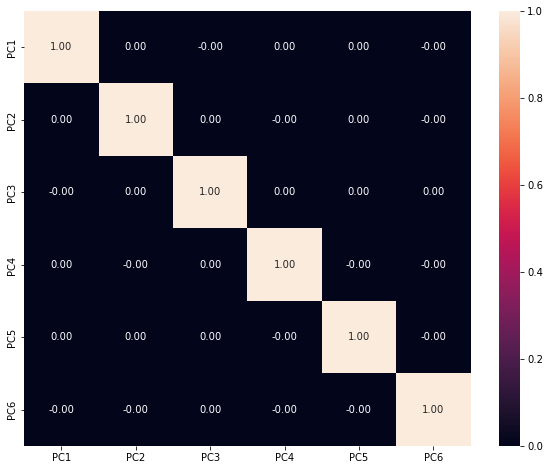

In [284]:
#Check for presence of correlations among teh PCs
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

No components in the final data is having any correlations between other components.

# 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]

This business case study is about education dataset which contain the names of various colleges, which has various details of colleges and university. To understand more about the dataset we perform univariate analysis and multivariate analysis which gives us the understanding about the variables. 

From analysis we can understand the distribution of the dataset, skew, and patterns in the dataset. 

From multivariate analysis we can understand the correlation of variables. Inference of multivariate analysis shows we can understand multiple variables highly correlated with each other. 

The scaling helps the dataset to standardize the variable in one scale. 

Outliers are imputed using IQR values once the values are imputed we can perform PCA. 

The principal component analysis is used reduce the multicollinearity between the variables. Depending on the variance of the dataset we can reduce the PCA components. 

The PCA components for this business case is 6 where we could understand the maximum variance of the dataset. Using the components we can now understand the reduced multicollinearity in the dataset